In [1]:
%matplotlib inline
import numpy as np
import pandas
import matplotlib.pyplot as plt


Vamos a cargar un conjunto de datos con la función `read_csv` de pandas:

In [2]:
df = pandas.read_csv('data/index_html.csv')
df.keys()

Index(['seconds'], dtype='object')

Text(0, 0.5, 'visits')

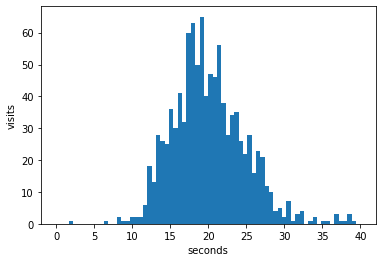

In [32]:
_ = plt.hist(df['seconds'], bins = 70, range = (0, 40,))
plt.xlabel('seconds')
plt.ylabel('visits')

In [4]:
df_caramelo = pandas.read_csv('data/caramelo_html.csv')
df_caramelo.keys()

Index(['seconds'], dtype='object')

El criterio que deberíamos usar para identificar las páginas scrapeadas de las que no lo són es el de observar 2 o más modas, siendo una de ellas claramente de muy corta duración. Un ser humano normal tarda un cierto tiempo en leer una página web mientras que un scrapeo debería ser muy homogeneo.

Vamos a intentar observar este fenómeno con los datos que tenemos. Evidentemente en el index no hay información interesante.

## CARAMELOS

Text(0, 0.5, 'visits')

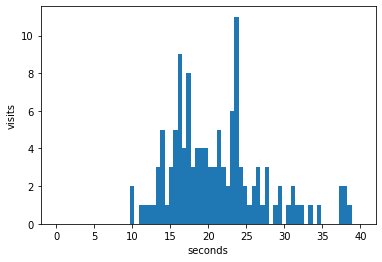

In [33]:
_ = plt.hist(df_caramelo['seconds'], bins = 70, range = (0, 40,))
plt.xlabel('seconds')
plt.ylabel('visits')

Aquí se aprecian varias modas. La que más me llama la atención sería el grupo de menos de 15 segundos, que está muy diferenciado del resto, pero esto no está nada claro que signifique que es por bots. Los tiempos son demasiado altos.

## CHICLE

In [6]:
df_chicle = pandas.read_csv('data/chicle_html.csv')
df_chicle.keys()

Index(['seconds'], dtype='object')

Text(0, 0.5, 'visits')

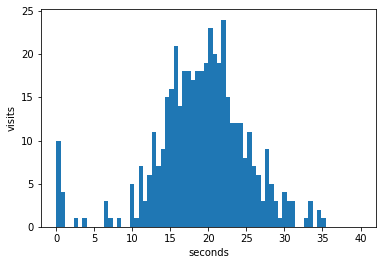

In [34]:
_ = plt.hist(df_chicle['seconds'], bins = 70, range = (0, 40,))
plt.xlabel('seconds')
plt.ylabel('visits')

Otra vez podemos apreciar una moda con muy pocos segundos. Esto me indica que tiene pinta de ser un bot, muy claramente ya que hay muchas visitas así.

## LOLLIPOP

In [10]:
df_lollipop = pandas.read_csv('data/lollipop_html.csv')
df_lollipop.keys()

Index(['seconds'], dtype='object')

Text(0, 0.5, 'visits')

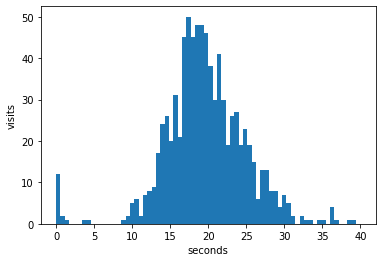

In [35]:
_ = plt.hist(df_lollipop['seconds'], bins = 70, range = (0, 40,))
plt.xlabel('seconds')
plt.ylabel('visits')

De nuevo un grupo con menos de 5 segundos, que indica la visita de un bot.

## MARSHMALLOW

In [12]:
df_marshmallow = pandas.read_csv('data/marshmallow_html.csv')
df_marshmallow.keys()

Index(['seconds'], dtype='object')

Text(0, 0.5, 'visits')

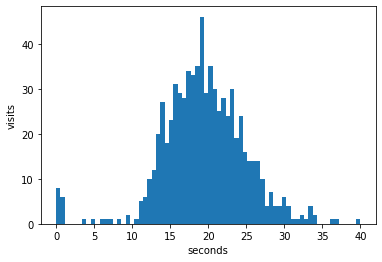

In [36]:
_ = plt.hist(df_marshmallow['seconds'], bins = 70, range = (0, 40,))
plt.xlabel('seconds')
plt.ylabel('visits')

Otra vez se observa una moda de visitas con muy pocos segundos de duración, que indica un bot.

## SUGUS

In [15]:
df_sugus = pandas.read_csv('data/sugus_html.csv')
df_sugus.keys()

Index(['seconds'], dtype='object')

Text(0, 0.5, 'visits')

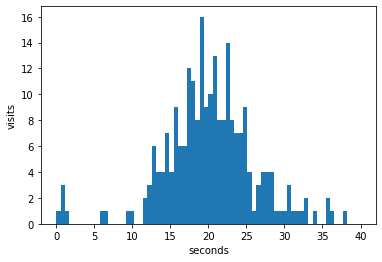

In [37]:
_ = plt.hist(df_sugus['seconds'], bins = 70, range = (0, 40,))
plt.xlabel('seconds')
plt.ylabel('visits')

Apreciamos aquí también varias visitas con menos de 5 segundos que es otro indicio muy claro de bot.

## GLOBAL

Text(0, 0.5, 'visits')

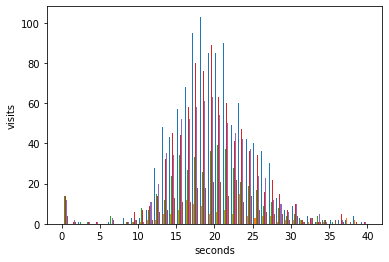

In [41]:
li = []
li.append(df['seconds'])
li.append(df_caramelo['seconds'])
li.append(df_chicle['seconds'])
li.append(df_lollipop['seconds'])
li.append(df_marshmallow['seconds'])
li.append(df_sugus['seconds'])
_ = plt.hist(li, bins = 40, range = (0, 40,))
plt.xlabel('seconds')
plt.ylabel('visits')

Text(0, 0.5, 'visits')

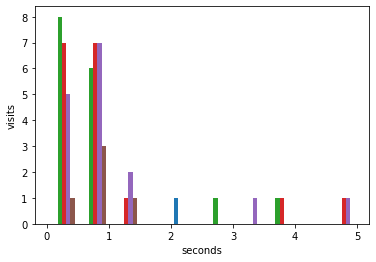

In [42]:
_ = plt.hist(li, range = (0, 5,))
plt.xlabel('seconds')
plt.ylabel('visits')

Sospechosos de scrappeo globales. Posiblemente nos podríamos concentrar en los 3 primeros grupos.

## CONCLUSIONES

1. Las páginas scrappeadas son: chicle, lollipop, marshmallow y sugus. Usamos como criterio del de identificar una moda que tenga muy pocos segundos de duración.
2. Para estimar a mano el número de apróximado de visitas de bots deberíamos crear una gráfica global con todos los datos.
3. Un programa que indique si se está scrappeando la web debería mirar el porcentaje de visitas inferiores a 5 segundos. Si este porcentaje supera cierto umbral dar positivo.